In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve, classification_report, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./data/phishing_url.csv')

In [3]:
data.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [5]:
data.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


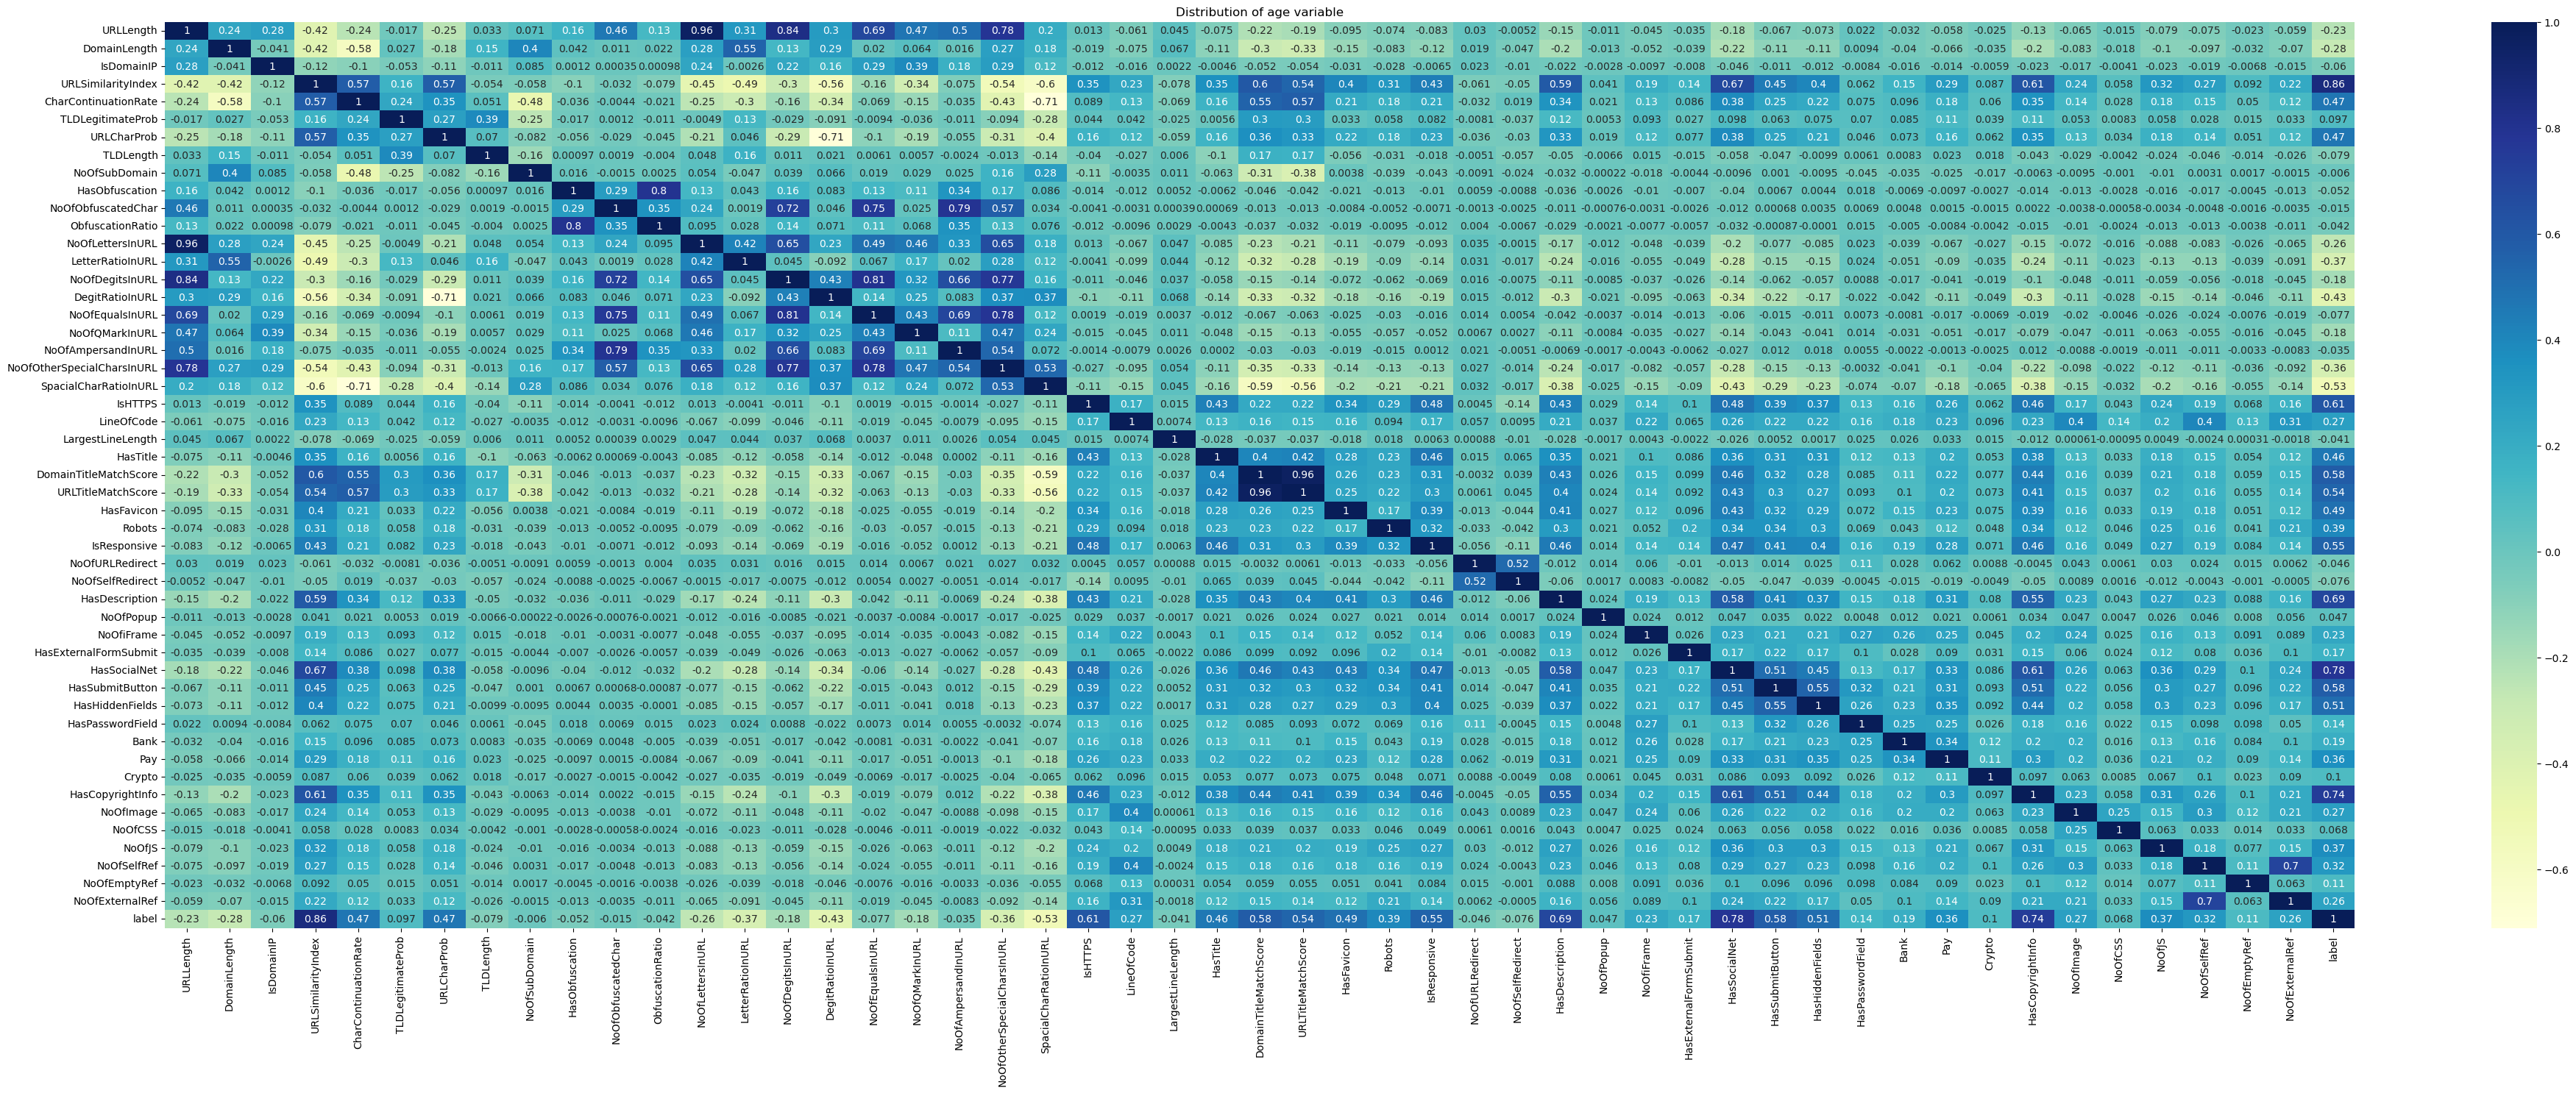

In [6]:
corr_matrix = data.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(48, 16))
ax = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
ax.set_title("Distribution of age variable")
plt.show()

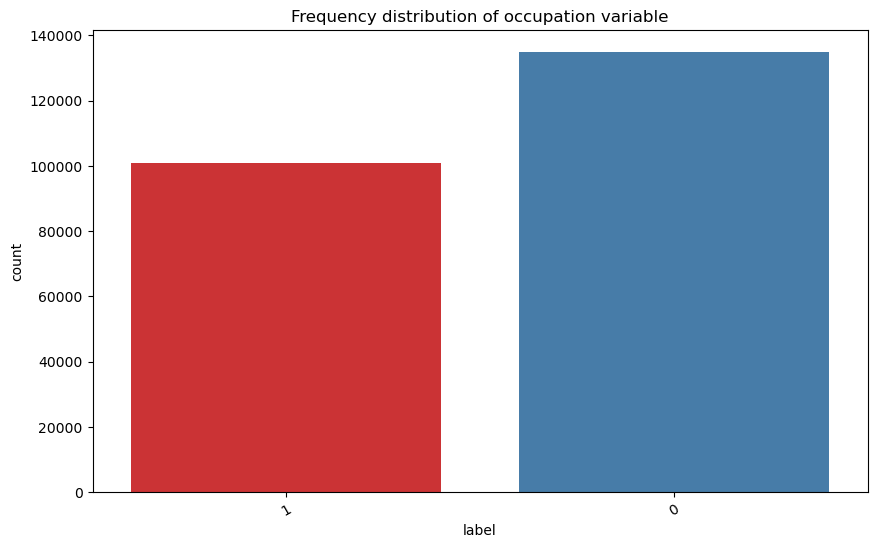

In [7]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x="label", data=data, palette="Set1")
ax.set_title("Frequency distribution of occupation variable")
ax.set_xticklabels(data.label.value_counts().index, rotation=30)
plt.show()

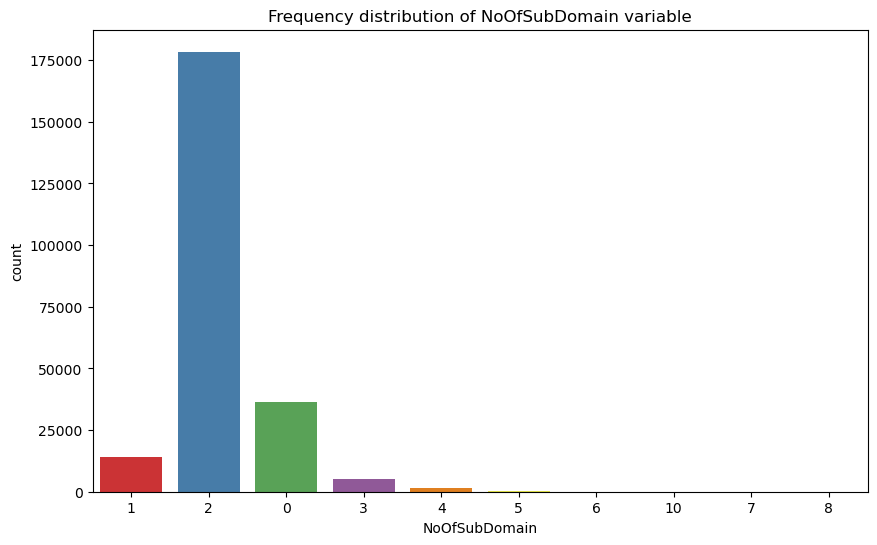

In [8]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x="NoOfSubDomain", data=data, palette="Set1")
ax.set_title("Frequency distribution of NoOfSubDomain variable")
ax.set_xticklabels(data.NoOfSubDomain.value_counts().index)
plt.show()

In [20]:
target_corr = corr_matrix['label']
target_corr

URLLength                    -0.233445
DomainLength                 -0.283152
IsDomainIP                   -0.060202
URLSimilarityIndex            0.860358
CharContinuationRate          0.467735
TLDLegitimateProb             0.097389
URLCharProb                   0.469749
TLDLength                    -0.079159
NoOfSubDomain                -0.005955
HasObfuscation               -0.052473
NoOfObfuscatedChar           -0.015315
ObfuscationRatio             -0.041915
NoOfLettersInURL             -0.258090
LetterRatioInURL             -0.367794
NoOfDegitsInURL              -0.177980
DegitRatioInURL              -0.432032
NoOfEqualsInURL              -0.076963
NoOfQMarkInURL               -0.175621
NoOfAmpersandInURL           -0.034622
NoOfOtherSpecialCharsInURL   -0.358891
SpacialCharRatioInURL        -0.533537
IsHTTPS                       0.609132
LineOfCode                    0.272257
LargestLineLength            -0.041111
HasTitle                      0.459725
DomainTitleMatchScore    

In [43]:
#only choose features with abs value > 0.1

threshold=0.1
relevant_features = target_corr[abs(target_corr)>threshold].index.tolist()
relevant_features

['URLLength',
 'DomainLength',
 'URLSimilarityIndex',
 'CharContinuationRate',
 'URLCharProb',
 'NoOfLettersInURL',
 'LetterRatioInURL',
 'NoOfDegitsInURL',
 'DegitRatioInURL',
 'NoOfQMarkInURL',
 'NoOfOtherSpecialCharsInURL',
 'SpacialCharRatioInURL',
 'IsHTTPS',
 'LineOfCode',
 'HasTitle',
 'DomainTitleMatchScore',
 'URLTitleMatchScore',
 'HasFavicon',
 'Robots',
 'IsResponsive',
 'HasDescription',
 'NoOfiFrame',
 'HasExternalFormSubmit',
 'HasSocialNet',
 'HasSubmitButton',
 'HasHiddenFields',
 'HasPasswordField',
 'Bank',
 'Pay',
 'HasCopyrightInfo',
 'NoOfImage',
 'NoOfJS',
 'NoOfSelfRef',
 'NoOfEmptyRef',
 'NoOfExternalRef',
 'label']

In [45]:
classes = data.label.unique()
classes

array([1, 0])

In [36]:
data.HasCopyrightInfo.value_counts()

HasCopyrightInfo
0    121016
1    114779
Name: count, dtype: int64

In [44]:
#only select relevant features

X = data[relevant_features]
X = X.drop('label', axis=1)
y = data['label']

In [51]:
def get_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [52]:
get_score(model, X_train, y_train, X_test, y_test, train=True)
get_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.63%
_______________________________________________
CLASSIFICATION REPORT:
                      0              1  accuracy      macro avg   weighted avg
precision      0.997245       0.995641  0.996326       0.996443       0.996328
recall         0.994172       0.997941  0.996326       0.996057       0.996326
f1-score       0.995706       0.996790  0.996326       0.996248       0.996326
support    80821.000000  107815.000000  0.996326  188636.000000  188636.000000
_______________________________________________
Confusion Matrix: 
 [[ 80350    471]
 [   222 107593]]

Test Result:
Accuracy Score: 99.64%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.997011      0.995939  0.996395      0.996475      0.996396
recall         0.994534      0.997781  0.996395      0.996157      0.996395
f1-score       0.995771      0.996859  0.996395      0.996

In [54]:
y_pred = model.predict(X_test)

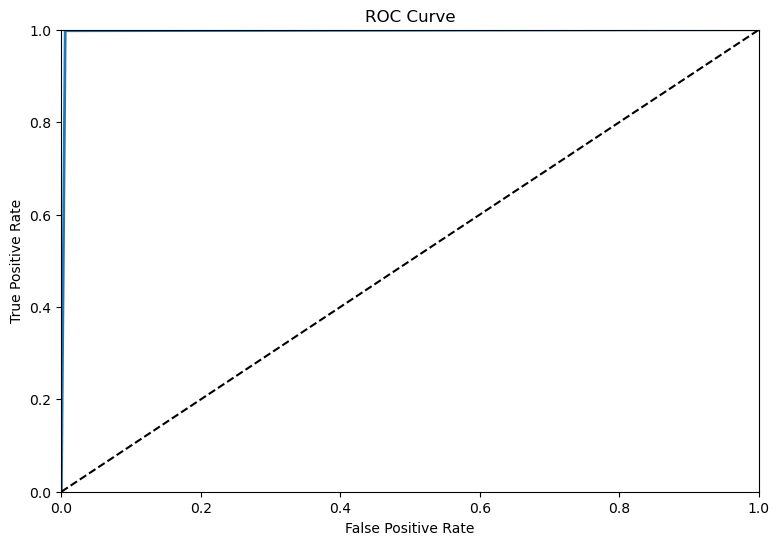

In [55]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(9,6)); 
plot_roc_curve(fpr, tpr)
plt.show();